In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt

from deproject import deproject, get_galaxy_specs

In [2]:
galaxy = 'NGC1365'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]

In [3]:
hdu_galx = fits.open('/Users/pathak.89/Downloads/background_comps/'+galaxy.lower()+'_irac1_atGauss4.fits')[0]

wcs_galx = WCS(hdu_galx.header)
wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
# data = hdu_galx.data.flatten() * np.cos(INCL*np.pi/180)
# radii = r_pc.flatten()

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

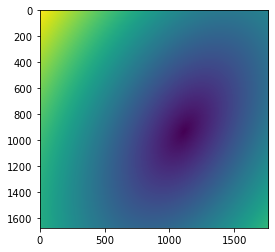

In [4]:
plt.imshow(r_pc)

## Incorporate the code provided to do the following:
### 1. Remake the figure above (radial distance in pc) using the WCS from the galaxy file header, similar and add axis labels and a color bar for radial distance (refer to `Fits_Image_Imshow.ipynb` for making images)
### 2. Make a mask (using logic statements and array slicing) in radius: Only display parts of the image where $R>5 kpc$.
### 3. Make a mask in intensity: Only display parts of the image where $I<1 MJy/sr$.